### make pseudo labels from csv

### Analysis Part

In [50]:
import random
anns = {}
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/submit_ensemble_620.csv'
with open(path,'r',encoding='utf8') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        id, label = line.strip().split(',')
        anns[id] = label

In [51]:
anns2 = {}
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/output/submit_ensemble_v.csv'
with open(path,'r',encoding='utf8') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        id, label = line.strip().split(',')
        anns2[id] = label

In [52]:
len(anns2)

20839

In [53]:
def compare(anns, anss2):
    counter = 0
    ids = []
    for k in anns:
        if anns[k]!=anns2[k]:
            # print(k)
            # print(anns[k],anns2[k])
            counter+=1
            ids.append(k)
    print(counter)
    return ids

In [54]:
anns3 = {}
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/output/submit_ensemble_p.csv'
with open(path,'r',encoding='utf8') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        id, label = line.strip().split(',')
        anns3[id] = label

In [55]:
ids2 = compare(anns, anns2)

400


In [56]:
ids3 = compare(anns, anns3)

400


In [57]:
len(replace_ids)

2434

In [58]:
len(set(replace_ids) - set(ids2))

2034

In [59]:
set(ids2)==set(ids3)
set(ids3)==set(ids2)

True

### 说明我们现在的模型，不是当初做出来0.62得分的模型，那个模型丢了

In [60]:
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/output/pseudo_labels.json'
import json
pseudo = []
with open(path,'r',encoding='utf8') as f:
    for line in f.readlines():
        tmp =json.loads(line)
        pseudo.append(tmp)

In [61]:
pseudo_ids = [x['id'] for x in pseudo]
len(pseudo_ids)

18405

In [62]:
replace_ids = list(set(anns.keys()) - set(pseudo_ids))
len(replace_ids)

2434

### 620的结果里，有2400多条数据没有被选入pseudo label，我们把这些没选入的数据拿出来，用他们的label来替换用伪标签做出来的提交结果（0.605）的label。发现直接从0.60提升回到了0.6207(比原版的0.6204还要高)，看来当初筛选的伪标签是存在问题的。

In [63]:
anns4 = {}
counter=0
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/sub_20221009_16_52.csv'
with open(path,'r',encoding='utf8') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        id, label = line.strip().split(',')
        anns4[id] = label
        if id in replace_ids:
            counter+=1
            anns4[id] = anns[id]
print(f'replaced counts {counter}')

replaced counts 2434


In [64]:
with open('/home/yfzx/work/yangsc/ccf2022_cls/best620/replaced_sub.csv', 'w') as f:
    f.write(f'id,label\n')
    for id, label in anns4.items():
        f.write(f'{id},{label}\n')

### 我们来分析下这筛选掉的2400多条数据的标签分布

In [65]:
import numpy as np

labels = [int(v) for k,v in anns.items()]
_, counts_full = np.unique(labels, return_counts=True)
counts_full

array([2460,  760, 4242,  252,  420, 1199,  812, 1040,  866,  360, 2228,
        827,   19,  513,  144,  437,  315,  197,  277,  209,  899,  435,
          6,  380,  331,  174,  224,   92,   31,   94,  122,  113,    7,
        164,  155,   35])

In [66]:
import matplotlib.pyplot as plt

def plot_bars(counts):
    freq = [x/sum(counts) for x in counts]

    xs=[*range(len(freq))]
    ys=freq

    plt.figure(figsize=(10,6), dpi=100)
    for x, y in zip(xs, ys):
        plt.bar(x, height=y, width=0.5)
    plt.show()

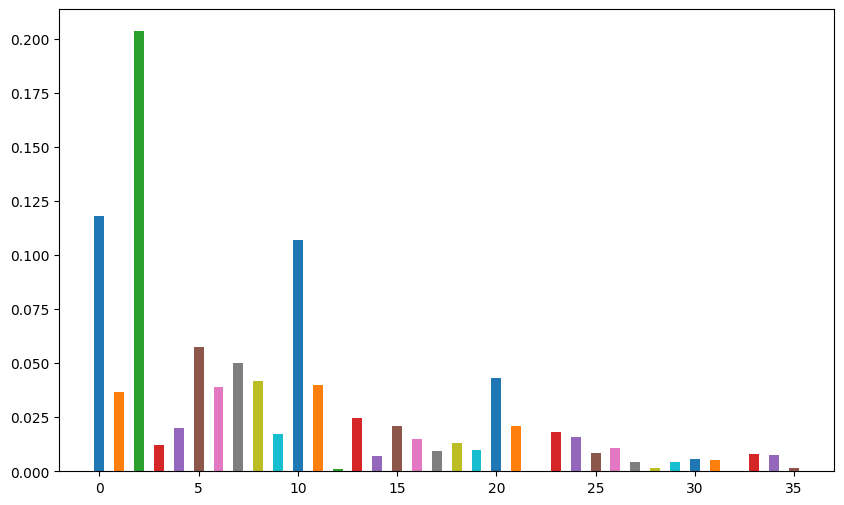

In [67]:
plot_bars(counts_full)

In [68]:
pl = [x['label_id'] for x in pseudo]
_, counts_pl = np.unique(pl, return_counts=True)
counts_pl

array([2313,  707, 3814,  172,  313, 1058,  709,  934,  788,  297, 2030,
        708,    9,  385,  109,  390,  300,  164,  200,  199,  840,  346,
          2,  317,  311,  160,  206,   56,   11,   73,   81,  102,    1,
        136,  135,   29])

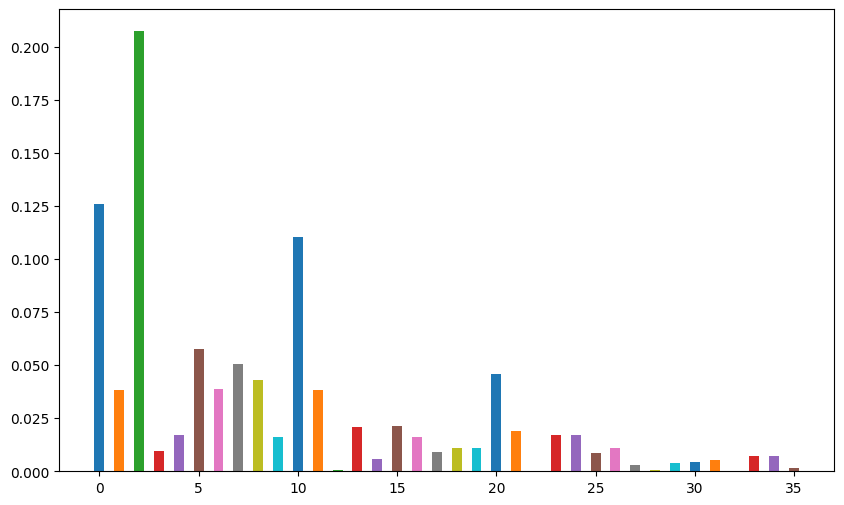

In [69]:
plot_bars(counts_pl)

In [70]:
re = [int(anns[k]) for k in anns if k in replace_ids]
_, counts_re = np.unique(re, return_counts=True)
counts_re

array([147,  53, 428,  80, 107, 141, 103, 106,  78,  63, 198, 119,  10,
       128,  35,  47,  15,  33,  77,  10,  59,  89,   4,  63,  20,  14,
        18,  36,  20,  21,  41,  11,   6,  28,  20,   6])

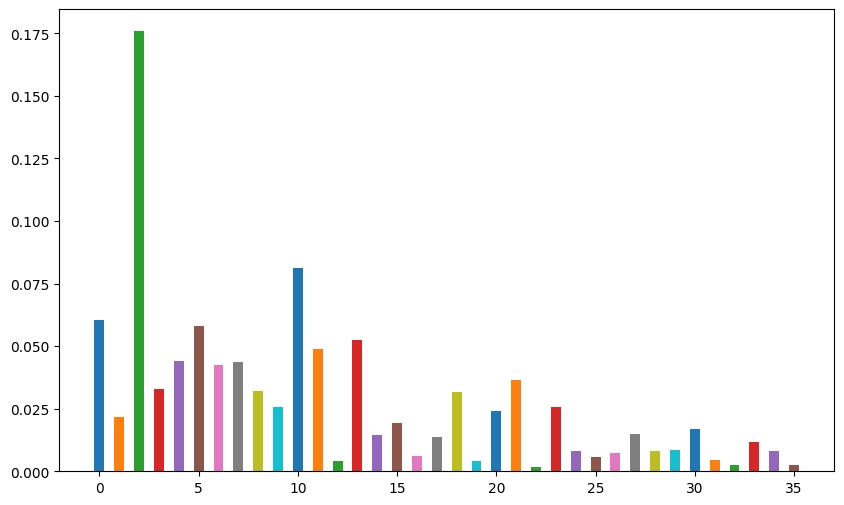

In [71]:
plot_bars(counts_re)

In [72]:
path = '/home/yfzx/work/yangsc/ccf2022_cls/data/train.json'
train = []
with open(path,'r',encoding='utf8') as f:
    for line in f.readlines():
        tmp =json.loads(line)
        train.append(tmp)

tr = [x['label_id'] for x in train]
_, counts_tr = np.unique(tr, return_counts=True)
counts_tr

array([ 33,  19, 183,  33,  44,  36,  47,  48,  39,  25,  52,  54,   7,
        16,  19,  33,  17,  13,  16,  13,  25,  12,   5,  22,  29,  16,
        17,  22,   8,   7,  13,   4,   5,   8,  12,   6])

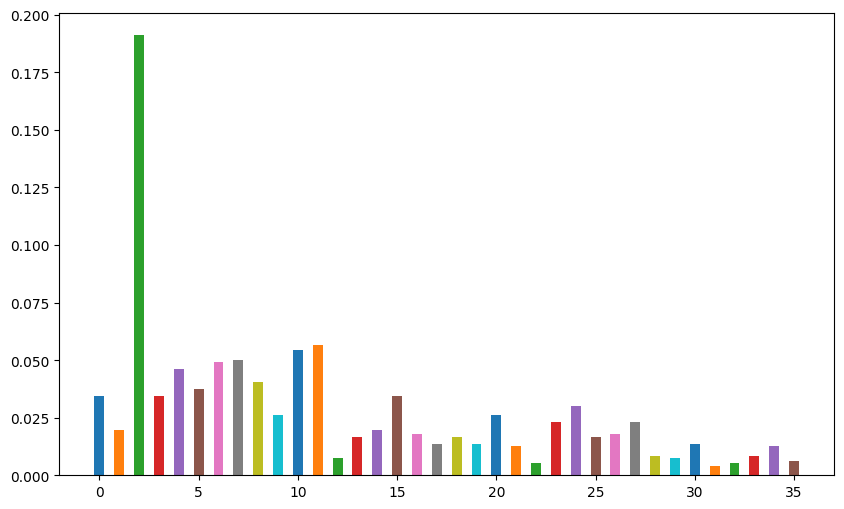

In [73]:
plot_bars(counts_tr)

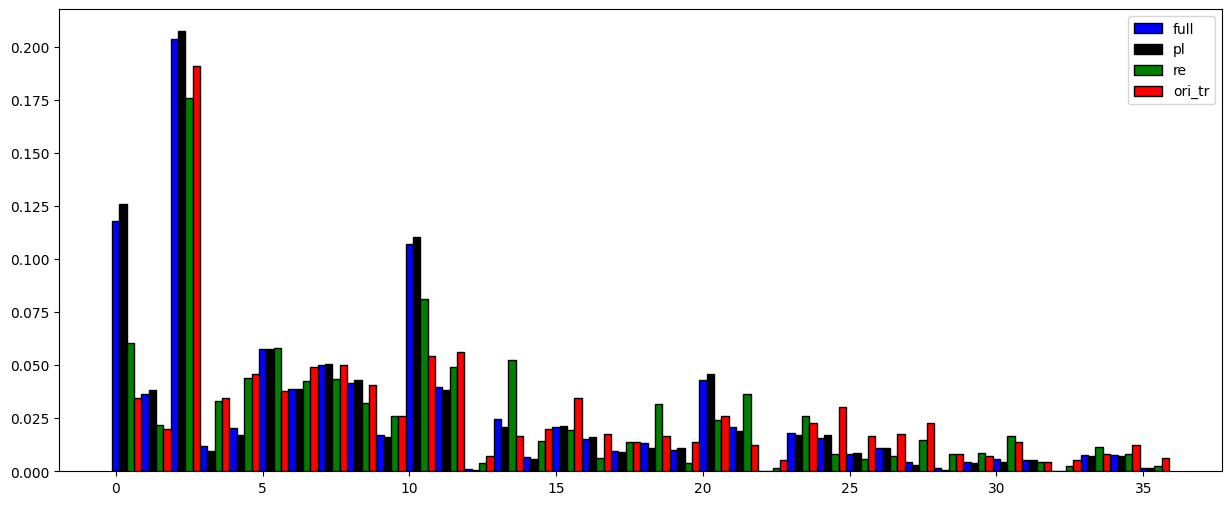

In [74]:
plt.figure(figsize=(15,6), dpi=100)
n = 4
width = 1/n
r = np.arange(len(counts_full))
f = lambda x: [y/sum(x) for y in x]

plt.bar(r, f(counts_full), color = 'b',
        width = width, edgecolor = 'black',
        label='full')
plt.bar(r+1*width, f(counts_pl), color = 'k',
        width = width, edgecolor = 'black',
        label='pl')
plt.bar(r+2*width, f(counts_re), color = 'g',
        width = width, edgecolor = 'black',
        label='re')
plt.bar(r+3*width, f(counts_tr), color = 'r',
        width = 1/n, edgecolor = 'black',
        label='ori_tr')
plt.legend()
plt.show()

### 上面这张图很明显的可以看出，对比pl, removed的都是小样本类别，而这些恰恰是提分最关键的类别，我们却都因为模型预测的一致性不够高（voting）或者预测不够确定（prob_merging）把这些关键的类别标签丢掉了。

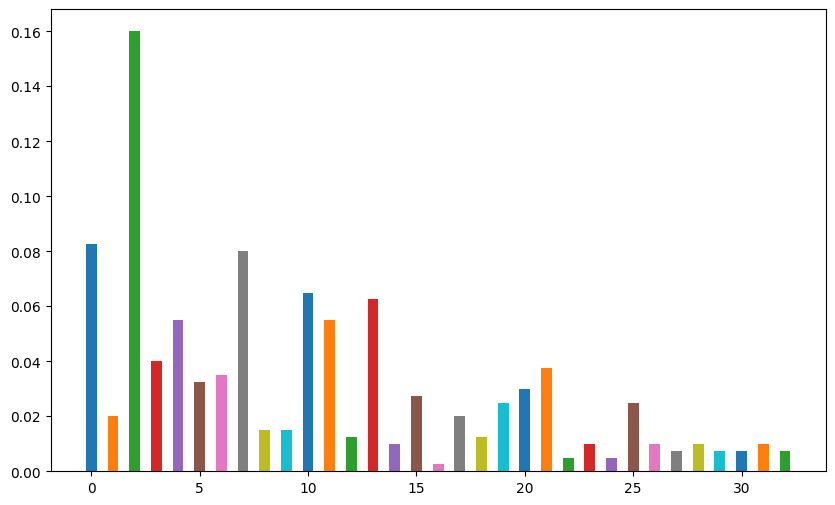

In [75]:
diff400 = [int(anns[x]) for x in ids2]
_, counts_diff = np.unique(diff400, return_counts=True)
plot_bars(counts_diff)

In [84]:
###把最好的620的pseudolabel做好

path1 = '/home/yfzx/work/yangsc/ccf2022_cls/data/testA.json' 
path2 = '/home/yfzx/work/yangsc/ccf2022_cls/data/pseudo_labels.json'

test = []
with open(path1,'r',encoding='utf8') as f:
    for line in f.readlines():
        tmp =json.loads(line)
        tmp['label_id'] = int(anns[tmp['id']])
        test.append(tmp)
# print(len(anns))
with open(path2, 'w') as f:
    for n in test:
        f.writelines(json.dumps(n, ensure_ascii=False)+'\n')

In [81]:
new = {}
path = '/home/yfzx/work/yangsc/ccf2022_cls/best620/submit_ensemble.csv'
# path = '/home/yfzx/work/yangsc/ccf2022_cls/sub_20221010_17_52.csv'
with open(path,'r',encoding='utf8') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        id, label = line.strip().split(',')
        new[id] = label

In [82]:
tot = len(replace_ids)
acc = 0
for id in replace_ids:
    if anns[id] == new[id]:
        acc+=1

acc/tot

0.6922760887428102